In [1]:
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sparkvent.client import *

In [32]:
client = Client("../conf/config.yml")

parser = ParserFactory.get_parser('app', client.config.server)
data = parser.get_data()
data = pd.DataFrame.from_dict(data.values())

# data_scale - exe  # -cpu#-mem#-table1-table2
data['scale'] = data['name'].map(lambda name: name.split('-')[1])
# remove datascale not digit
data = data[data['scale'].map(lambda scale: scale.isdigit())]
data['scale'] = data['scale'].map(lambda scale: int(scale))
data['duration'] = data['duration'].map(lambda duration: float(duration))

# remove rows with abnormal names
data = data[data['name'].map(lambda name: name.startswith('Q23'))]

data['exec_num'] = data['name'].map(lambda name: int(name.split('-')[2]))
data['cpu_num'] = data['name'].map(lambda name: int(name.split('-')[3]))
data['mem_num'] = data['name'].map(lambda name: int(name.split('-')[4]))
data['tbl1_name'] = data['name'].map(lambda name: name.split('-')[5])
data['tbl2_name'] = data['name'].map(lambda name: name.split('-')[6])




In [18]:
data

,duration,id,name,scale,exec_num,cpu_num,mem_num,tbl1_name,tbl2_name
0,295591,app-20170602170922-0431,Q23-5-4-4-4-partsupp-lineitem,5,4,4,4,partsupp,lineitem
1,241715,app-20170606103815-0309,Q23-4-2-4-4-partsupp-lineitem,4,2,4,4,partsupp,lineitem
2,92357,app-20170606120224-0358,Q23-5-2-4-4-customer-order,5,2,4,4,customer,order
3,41954,app-20170603095808-0892,Q23-5-4-4-4-nation-region,5,4,4,4,nation,region
4,64169,app-20170602153802-0356,Q23-4-4-4-4-supplier-partsupp,4,4,4,4,supplier,partsupp
5,67479,app-20170602144252-0339,Q23-4-4-4-4-part-partsupp,4,4,4,4,part,partsupp
6,276820,app-20170602104539-0251,Q23-3-4-4-4-partsupp-lineitem,3,4,4,4,partsupp,lineitem
7,48053,app-20170609024304-0007,Q23-1-2-4-4-customer-order,1,2,4,4,customer,order
8,53363,app-20170606075654-0211,Q23-3-2-4-4-part-partsupp,3,2,4,4,part,partsupp
9,53305,app-20170602054541-0146,Q23-2-4-4-4-part-partsupp,2,4,4,4,part,partsupp


In [5]:
app_ids = data['id']

In [7]:
app_ids

0       app-20170602170922-0431
1       app-20170606103815-0309
2       app-20170606120224-0358
3       app-20170603095808-0892
4       app-20170602153802-0356
5       app-20170602144252-0339
6       app-20170602153534-0354
7       app-20170606075654-0211
8       app-20170602054541-0146
9       app-20170603041202-0680
10      app-20170602182517-0465
11      app-20170603075307-0831
12      app-20170602155427-0372
13      app-20170602103045-0241
14      app-20170606054118-0114
15      app-20170605182517-0963
16      app-20170603062248-0777
17      app-20170606121100-0363
18      app-20170602124335-0285
19      app-20170603090235-0873
20      app-20170606083050-0228
21      app-20170606120916-0362
22      app-20170606144005-0422
23      app-20170606085938-0248
24      app-20170602050622-0108
25      app-20170602050043-0101
26      app-20170602155253-0370
27      app-20170606031546-0000
28      app-20170603140039-0925
29      app-20170606124056-0370
                 ...           
1715    

In [6]:
parser = ParserFactory.get_parser('stage', client.config.server)
stages = parser.get_sample_data()
stages

{u'app-20170602054541-0146:stages:0': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 2,
  'numFailedTasks': 0,
  'stageId': 0,
  'status': u'COMPLETE'},
 u'app-20170602054541-0146:stages:1': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 2,
  'numFailedTasks': 0,
  'stageId': 1,
  'status': u'COMPLETE'},
 u'app-20170602054541-0146:stages:2': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 200,
  'numFailedTasks': 0,
  'stageId': 2,
  'status': u'COMPLETE'},
 u'app-20170602104539-0251:stages:0': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 3,
  'numFailedTasks': 0,
  'stageId': 0,
  'status': u'COMPLETE'},
 u'app-20170602104539-0251:stages:1': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 18,
  'numFailedTasks': 0,
  'stageId': 1,
  'status': u'COMPLETE'},
 u'app-20170602104539-0251:stages:2': {'attemptId': 0,
  'numActiveTasks': 0,
  'numCompleteTasks': 200,
  'numFailedTasks': 0,
  'stageId': 2,
  'status': u

In [7]:
data

,duration,id,name,scale,exec_num,cpu_num,mem_num,tbl1_name,tbl2_name
0,295591,app-20170602170922-0431,Q23-5-4-4-4-partsupp-lineitem,5,4,4,4,partsupp,lineitem
1,241715,app-20170606103815-0309,Q23-4-2-4-4-partsupp-lineitem,4,2,4,4,partsupp,lineitem
2,92357,app-20170606120224-0358,Q23-5-2-4-4-customer-order,5,2,4,4,customer,order
3,41954,app-20170603095808-0892,Q23-5-4-4-4-nation-region,5,4,4,4,nation,region
4,64169,app-20170602153802-0356,Q23-4-4-4-4-supplier-partsupp,4,4,4,4,supplier,partsupp
5,67479,app-20170602144252-0339,Q23-4-4-4-4-part-partsupp,4,4,4,4,part,partsupp
6,276820,app-20170602104539-0251,Q23-3-4-4-4-partsupp-lineitem,3,4,4,4,partsupp,lineitem
7,48053,app-20170609024304-0007,Q23-1-2-4-4-customer-order,1,2,4,4,customer,order
8,53363,app-20170606075654-0211,Q23-3-2-4-4-part-partsupp,3,2,4,4,part,partsupp
9,53305,app-20170602054541-0146,Q23-2-4-4-4-part-partsupp,2,4,4,4,part,partsupp


In [18]:

%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
trial_data = data.loc[:, ['duration', 'scale', 'exec_num', 'cpu_num', 'mem_num']]
trial_data['cpu_num'] = trial_data['cpu_num'] / trial_data['exec_num']
trial_data['mem_num'] = trial_data['mem_num'] / trial_data['exec_num']
trial_data['duration'] = trial_data['duration'] / 1000

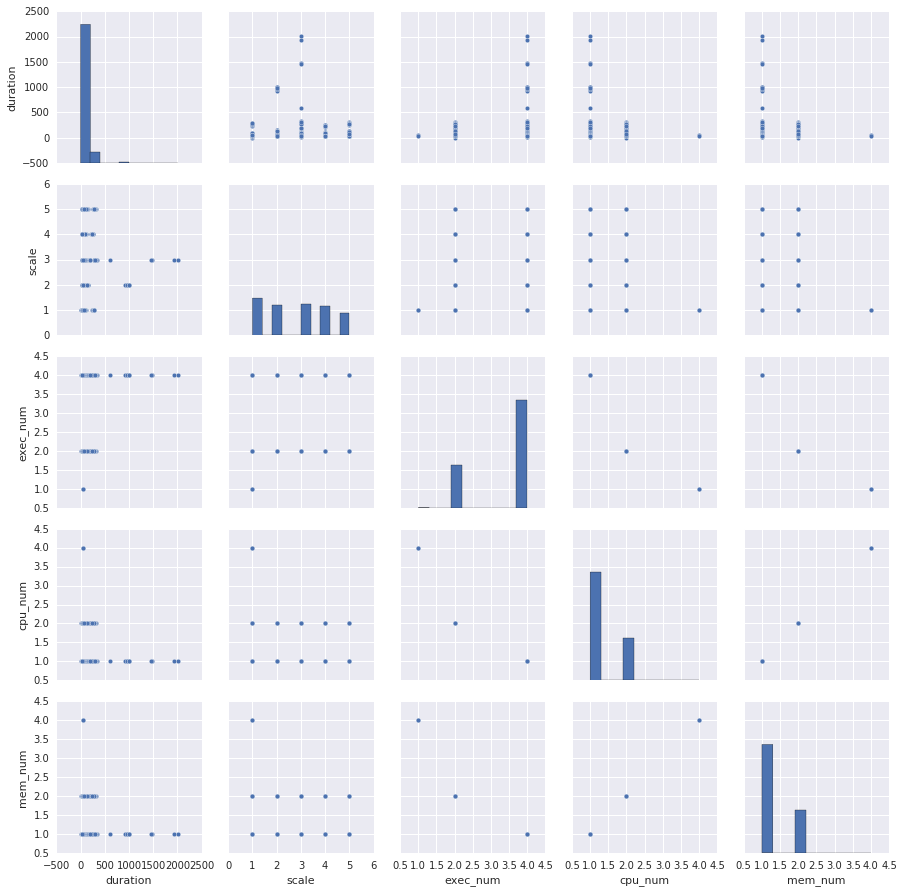

In [41]:
sns_plot = sns.pairplot(trial_data)

In [42]:
sns_plot.savefig("firt_try.pdf")

In [43]:
trial_data

,duration,scale,exec_num,cpu_num,mem_num
0,295.591,5,4,1.0,1.0
1,241.715,4,2,2.0,2.0
2,92.357,5,2,2.0,2.0
3,41.954,5,4,1.0,1.0
4,94.872,1,2,2.0,2.0
5,64.169,4,4,1.0,1.0
6,67.479,4,4,1.0,1.0
7,276.820,3,4,1.0,1.0
8,48.053,1,2,2.0,2.0
9,53.363,3,2,2.0,2.0
